In [1]:
import numpy as np
import pandas as pd
from scipy.fftpack import fft, ifft, fftshift,fftfreq, ifftn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools
from matplotlib import animation
from IPython.display import HTML
# %matplotlib inline


# Data Preprocessing

In [96]:
data = pd.read_csv('../data/my_dataset.txt', sep='\s+',header=None)

In [3]:
data.head()

,0,1,2
0,13463209,0.99319,15
1,13464268,1.00190,15
2,13466769,1.00700,15
3,13469274,1.00380,15
4,13471782,1.01250,15


In [4]:
data.shape, float(data.shape[0]) / 5

((196735, 3), 39347.0)

In [90]:
x = data[1]
lin_space = np.linspace(0,1, 5)

# Data Visualisation

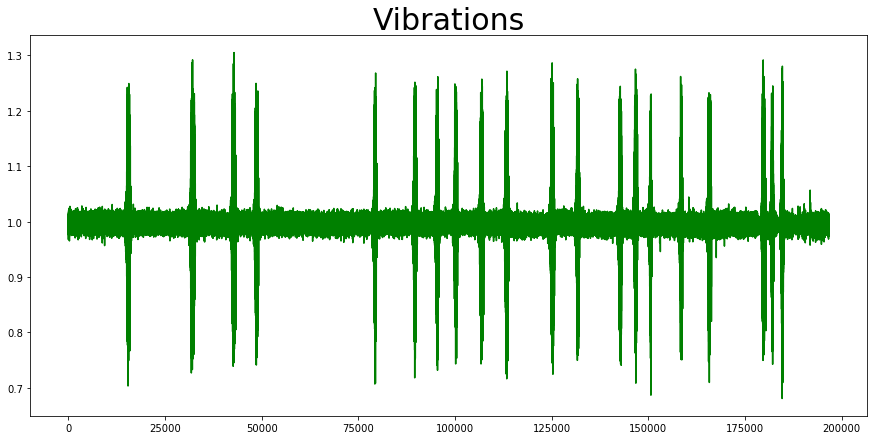

In [6]:
plt.figure(figsize=(15,7))
axes = plt.gca()
x_d = np.linspace(0, len(data[0]), len(data[0]), endpoint=True)
plt.title('Vibrations', fontsize=30)
plt.plot(x_d, data[1], color='green')
plt.show()

# Fourier Transform

In [8]:
original_lists = list()
fourier_lists = list()
window_size = 5
n = 0

for i in range(len(x) - 1):
#     print(x[n:n + window_size])
    window = fft(x[n:n + window_size])
    fourier_lists.append(window)
    original_lists.append(x[n:n + window_size])
    n += window_size - 4


In [ ]:
vectors_lengths = [np.linalg.norm(el) for el in fourier_lists]

# One Strike
## Real strike

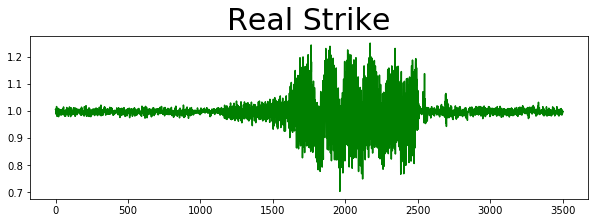

In [91]:
one_strice = x[13500:17000]
plt.figure(figsize=(10,3))
axes = plt.gca()
x_data = np.linspace(0, len(one_strice), len(one_strice), endpoint=True)
plt.title('Real Strike', fontsize=30)
plt.plot(x_data, one_strice, color='green')
plt.show()

In [16]:
def fourier_transform(x, window_size, stride):
    """
    Args:
     - x: input data;
     - window_size: size of the sliding window;
     - stride: stride of the sliding window;
    
    Return:
     - tuple: (original data, fourier_transromation)
    """
    original_data = list()
    fourier_transformation = list()
    index = 0
    for i in range(len(x) - window_size):
        cur_window = x[index:index + window_size]
        fourier = fft(cur_window)
        original_data.append(cur_window)
        fourier_transformation.append(fourier)
        index += stride
    return (original_data, fourier_transformation)


In [54]:
original_data = list()
fourier_transformation = list()
window_size = 500
stride = 50
index = 0

In [55]:
for i in range(3500 / 50):
    cur_window = one_strice[index:index + window_size]
    fourier = fft(cur_window)
    original_data.append(cur_window)
    fourier_transformation.append(fourier)
    index += window_size - (window_size - stride)

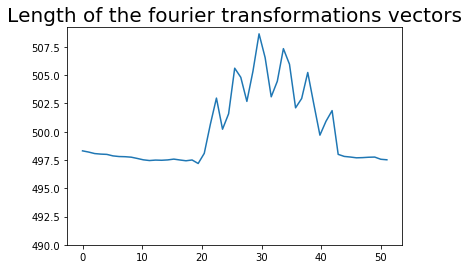

In [92]:
length = [np.linalg.norm(x) for x in fourier_transformation[: - 9]]

plt.plot(np.linspace(0, len(length), len(length)), length)
plt.title('Length of the fourier transformations vectors', fontsize = 20)
plt.ylim(490)
plt.show()

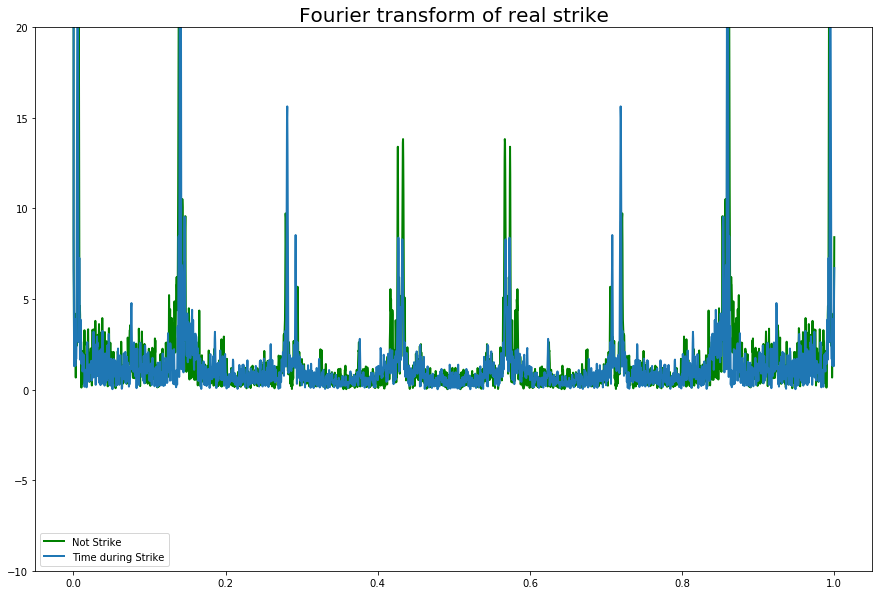

In [107]:
# for i in range(len(fourier_transformation) - 9):
#     plt.plot(np.linspace(0,1, 500), fourier_transformation[i])
plt.figure(figsize=(15,10))
# plt.plot(np.linspace(0,1, 500), fourier_transformation[1] - 5, linewidth=2.5)
# plt.plot(np.linspace(0,1, 500), fourier_transformation[30], linewidth=2.0)
plt.plot(np.linspace(0,1, len(one_strice)), [np.linalg.norm(x) for x in fft(one_strice)], linewidth=2.0, color='green')
plt.plot(np.linspace(0,1, len(fake)), [np.linalg.norm(x) for x in fft(fake)], linewidth=2.0)

plt.title("Fourier transform of real strike", fontsize=20)
plt.ylim(-10,20)
plt.legend(['Not Strike', 'Time during Strike'])
plt.show()

## Fake Strike

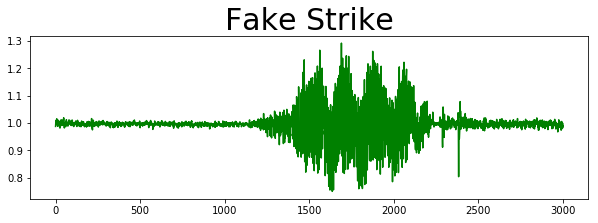

In [61]:
fake = x[178000:181000]
plt.figure(figsize=(10,3))
axes = plt.gca()
x_data = np.linspace(0, len(fake), len(fake), endpoint=True)
plt.title('Fake Strike', fontsize=30)
plt.plot(x_data, fake, color='green')
plt.show()

In [62]:
original_data = list()
fourier_transformation = list()
window_size = 500
stride = 50
index = 0

In [63]:
for i in range(3000 / 50):
    cur_window = fake[index:index + window_size]
    fourier = fft(cur_window)
    original_data.append(cur_window)
    fourier_transformation.append(fourier)
    index += window_size - (window_size - stride)

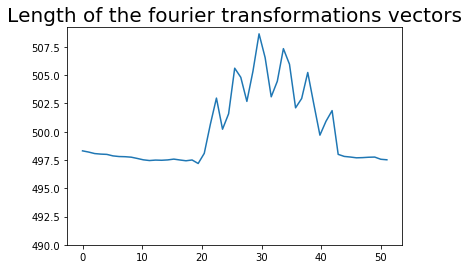

In [64]:
length = [np.linalg.norm(x) for x in fourier_transformation[: - 9]]

plt.plot(np.linspace(0, len(length), len(length)), length)
plt.title('Length of the fourier transformations vectors', fontsize = 20)
plt.ylim(490)
plt.show()

In [116]:
pd.Series([np.linalg.norm(x) for x in fourier_transformation[30]]).nlargest(9)

0      503.295250
70      26.865252
430     26.865252
3       17.835750
497     17.835750
71       8.601966
429      8.601966
140      8.394151
360      8.394151
dtype: float64

In [117]:
pd.Series([np.linalg.norm(x) for x in fourier_transformation_real_strike[30]]).nlargest(9)

0      499.312010
70      17.359503
430     17.359503
3       10.912998
497     10.912998
71       8.568092
429      8.568092
4        7.933018
496      7.933018
dtype: float64

In [58]:
fourier_transformation_real_strike = fourier_transformation


In [89]:
print "Fake: "
print max([np.linalg.norm(x) for x in fourier_transformation[30]]) -  min([np.linalg.norm(x) for x in fourier_transformation[30]])
print 
print "Real"
print  max([np.linalg.norm(x) for x in fourier_transformation_real_strike[30]]) - min([np.linalg.norm(x) for x in fourier_transformation_real_strike[30]])

Fake: 
503.2837

Real
499.273217454


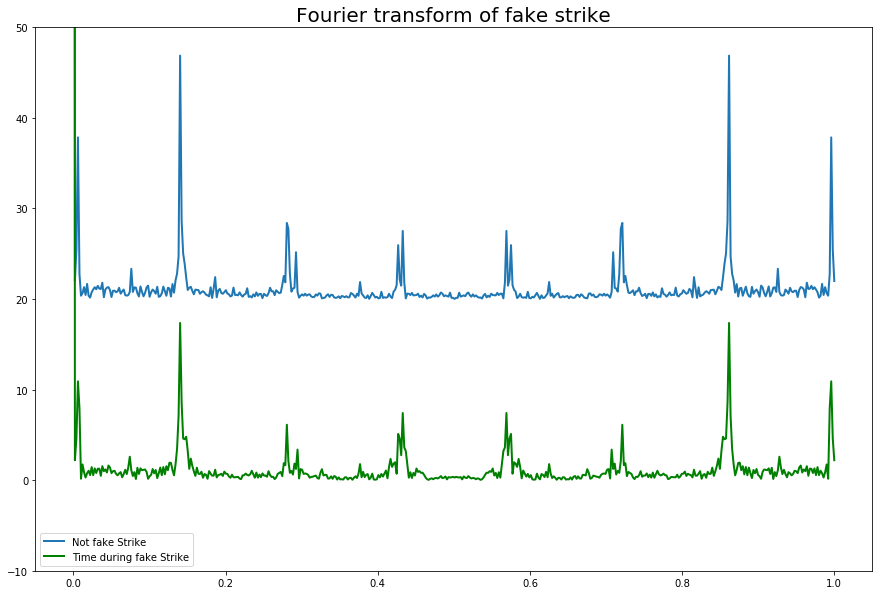

In [71]:
# for i in range(len(fourier_transformation) - 9):
#     plt.plot(np.linspace(0,1, 500), fourier_transformation[i])
plt.figure(figsize=(15,10))

# plt.plot(np.linspace(0,1, 500), fourier_transformation[30].real, linewidth=2.5)
# plt.plot(np.linspace(0,1, 500), fourier_transformation[30] + 10, linewidth=2.5)
plt.plot(np.linspace(0,1, 500), [np.linalg.norm(x) + 20 for x in fourier_transformation[30]], linewidth=2.0)
plt.plot(np.linspace(0,1, 500), [np.linalg.norm(x) for x in 
                                 fourier_transformation_real_strike[30]], linewidth=2.0, color='green')

# plt.plot(np.linspace(0,1, 500), [np.linalg.norm(x) for x in fourier_transformation[30]], linewidth=2.0)

plt.title("Fourier transform of fake strike", fontsize=20)
plt.ylim(-10,50)
plt.legend(['Not fake Strike', 'Time during fake Strike'])
plt.show()

# Comparison

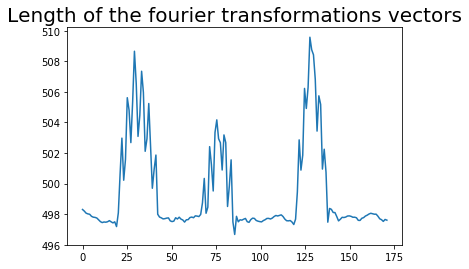

In [105]:
x = data[1]
fake = x[178000:187000]
original_data = list()
fourier_transformation = list()
window_size = 500
stride = 50
index = 0
for i in range(9000 / 50):
    cur_window = fake[index:index + window_size]
    fourier = fft(cur_window)
    original_data.append(cur_window)
    fourier_transformation.append(fourier)
    index += window_size - (window_size - stride)
    
length = [np.linalg.norm(x) for x in fourier_transformation[: - 9]]

plt.plot(np.linspace(0, len(length), len(length)), length)
plt.title('Length of the fourier transformations vectors', fontsize = 20)
plt.ylim(496)
plt.show()

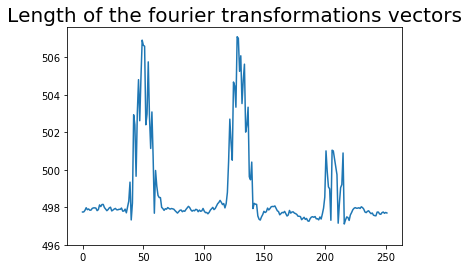

In [104]:
x = data[1]
fake = x[140000:153000]
original_data = list()
fourier_transformation = list()
window_size = 500
stride = 50
index = 0
for i in range(13000 / 50):
    cur_window = fake[index:index + window_size]
    fourier = fft(cur_window)
    original_data.append(cur_window)
    fourier_transformation.append(fourier)
    index += window_size - (window_size - stride)

length = [np.linalg.norm(x) for x in fourier_transformation[: - 9]]

plt.plot(np.linspace(0, len(length), len(length)), length)
plt.title('Length of the fourier transformations vectors', fontsize = 20)
plt.ylim(496)
plt.show()

In [148]:
only_strike_data = data[2][data[2] == 9]

In [219]:
getting_indexes = [only_strike_data.index[x] for x in range(1, len(only_strike_data)) 
                   if abs(only_strike_data.index[x - 1] - only_strike_data.index[x]) > 800]

In [220]:
getting_indexes, len(getting_indexes)

([31533,
  42674,
  48512,
  79028,
  89339,
  95008,
  99826,
  105970,
  113010,
  124682,
  131479,
  141594,
  146107,
  150093,
  157729,
  165027],
 16)

In [227]:
strikes = [data[1].iloc[x: x + 500] for x in getting_indexes]
lengths = [np.linalg.norm(x) for x in strikes]

In [228]:
lengths

[22.557161701495158,
 22.748742218355719,
 22.587012485992918,
 22.620566698157674,
 22.647719834210683,
 22.480468929619772,
 22.57057209058512,
 22.245333656798678,
 22.497415536516634,
 22.569908865106214,
 22.600044080202586,
 22.26977083792961,
 22.404666339776185,
 22.306874666626879,
 22.237847962847034,
 22.271269595166775]

In [232]:
fourier_transformation[0]

array([  4.98300670e+02+0.j        ,   1.76062447e-01-0.21786184j,
         2.12294370e-01-0.0649424j ,  -1.90649131e-01+0.16199098j,
         1.33564478e-01+0.04109578j,   1.58047684e-01+0.09267913j,
        -1.12256919e-01-0.12079694j,   4.98615010e-02-0.07068255j,
        -7.97108714e-02-0.06941846j,  -7.48760753e-02-0.00704854j,
        -8.52839470e-02-0.03664893j,   1.07887242e-01-0.0786076j ,
         2.04884207e-01-0.02624156j,   1.70082577e-01-0.22049169j,
         6.96204728e-02-0.16120032j,   1.77411801e-01+0.08344791j,
         3.31427268e-02-0.04409837j,  -1.96150008e-01-0.19903561j,
         8.57379162e-03+0.1224237j ,  -9.06119359e-02+0.0264007j ,
        -1.26634817e-01-0.03219435j,  -8.10460059e-02+0.1934007j ,
        -3.19092395e-01+0.07245664j,  -1.32158772e-03-0.26333623j,
         2.15309269e-02+0.01901773j,   1.07260264e-01+0.01982381j,
         9.49271497e-03-0.10886882j,  -1.20936715e-01-0.17626759j,
        -2.70769955e-01+0.01170324j,   1.90735528e-01+0.096430

In [109]:
data.columns = ['timestamp', 'value', 'label']

In [111]:
data.to_csv('Data.csv')